In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
F_SAMPLING = 80e6
N = 128
BASE_HARMONIC = 3
CONVERSION_CYCLES = 2
F_SIGNAL = F_SAMPLING / N * BASE_HARMONIC / CONVERSION_CYCLES

print("Signal frequency:", F_SIGNAL, "Hz")

Signal frequency: 937500.0 Hz


In [28]:
tt = np.loadtxt("../designs/tgate/fft_vout.txt")
ss = np.loadtxt("../designs/tgate_slow/fft_vout.txt")

tt_freq = tt[:-1, 0]
ss_freq = ss[:-1, 0]
tt_ampl = tt[:-1, 1]
ss_ampl = ss[:-1, 1]

tt_sdr = tt[-1, 0]
ss_sdr = ss[-1, 0]
tt_enob = tt[-1, 1]
ss_enob = ss[-1, 1]

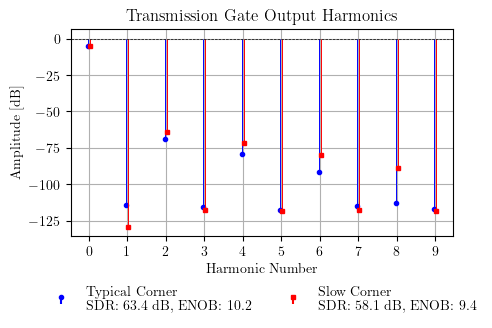

In [ ]:
plot_params = {
    'font.family': 'serif',
    'font.serif': ['Computer Modern'],
    'mathtext.fontset': 'cm',
    'text.usetex': True,
}

# Find harmonic frequencies (multiples of F_SIGNAL)
def find_harmonics(freq_data, amp_data, fundamental_freq, max_harmonics=10):
    harmonics_freq = []
    harmonics_amp = []
    
    for h in range(1, max_harmonics + 1):
        target_freq = h * fundamental_freq
        # Find closest frequency bin
        idx = np.argmin(np.abs(freq_data - target_freq))
        if np.abs(freq_data[idx] - target_freq) < fundamental_freq * 0.1:  # Within 10% tolerance
            harmonics_freq.append(freq_data[idx])
            harmonics_amp.append(amp_data[idx])
    
    return np.array(harmonics_freq), np.array(harmonics_amp)

# Extract harmonics for both corners
tt_harm_freq, tt_harm_amp = find_harmonics(tt_freq, tt_ampl, F_SIGNAL)
ss_harm_freq, ss_harm_amp = find_harmonics(ss_freq, ss_ampl, F_SIGNAL)

with plt.rc_context(plot_params):
    plt.figure(figsize=(5, 3.5))
    
    # Convert to dB and create stem plots
    tt_harm_db = 20 * np.log10(tt_harm_amp)
    ss_harm_db = 20 * np.log10(ss_harm_amp)
    
    # Create harmonic numbers for x-axis
    tt_harmonics = tt_harm_freq / F_SIGNAL - 1
    ss_harmonics = ss_harm_freq / F_SIGNAL - 1
    
    markerline1, stemlines1, baseline1 = plt.stem(tt_harmonics - 0.025, tt_harm_db, linefmt='b-', markerfmt='bo', basefmt=' ', label=f'Typical Corner\nSDR: {tt_sdr:.1f} dB, ENOB: {tt_enob:.1f}')
    plt.setp(stemlines1, 'linewidth', 0.7)
    plt.setp(markerline1, 'markersize', 3)
    
    markerline2, stemlines2, baseline2 = plt.stem(ss_harmonics + 0.025, ss_harm_db, linefmt='r-', markerfmt='rs', basefmt=' ', label=f'Slow Corner\nSDR: {ss_sdr:.1f} dB, ENOB: {ss_enob:.1f}')
    plt.setp(stemlines2, 'linewidth', 0.7)
    plt.setp(markerline2, 'markersize', 3)

    # Mark 0dB line
    plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
    
    plt.xlabel('Harmonic Number')
    plt.ylabel('Amplitude [dB]')
    plt.grid(True)
    # Legend above below outside the plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=2, frameon=False)

    plt.xticks(np.arange(0, 10, 1))
    
    plt.title('Transmission Gate Output Harmonics')
    plt.tight_layout()
    plt.savefig("tgate_harmonics.pdf", bbox_inches='tight')
    plt.show()

Total Harmonics:
		128pts	1024pts
Typical Corner:	-63.72	-63.72
Slow Corner:	-59.02	-59.01


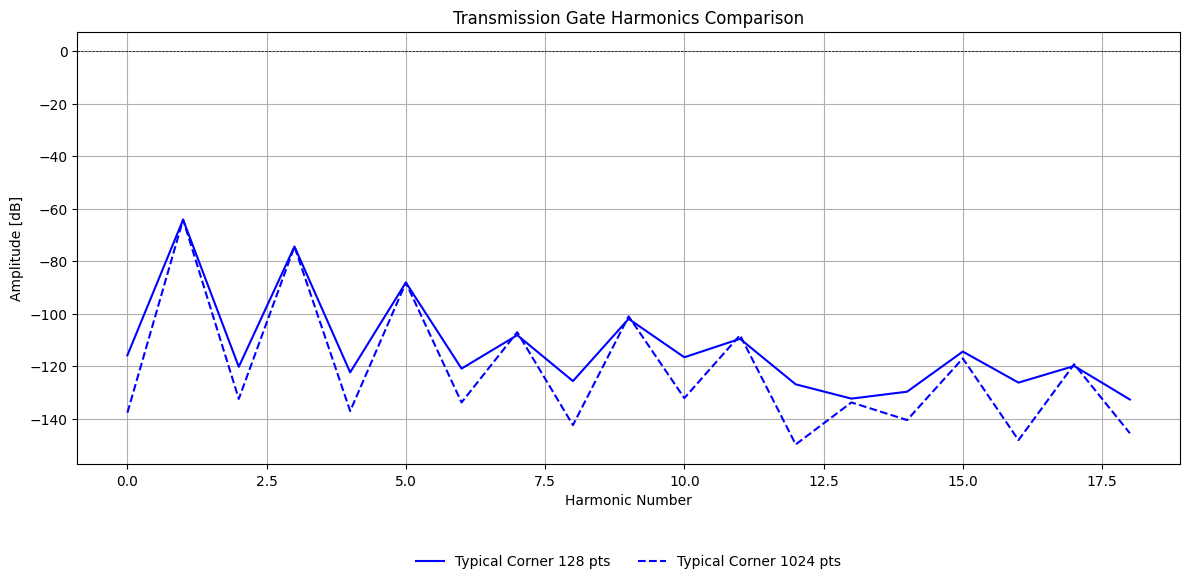

In [30]:
harmonics_tt_128 = np.load("../designs/tgate/harmonics128.npy")
harmonics_ss_128 = np.load("../designs/tgate_slow/harmonics128.npy")
harmonics_tt_1024 = np.load("../designs/tgate/harmonics1024.npy")
harmonics_ss_1024 = np.load("../designs/tgate_slow/harmonics1024.npy")

tot_tt_128 = np.sum(harmonics_tt_128)
tot_ss_128 = np.sum(harmonics_ss_128)
tot_tt_1024 = np.sum(harmonics_tt_1024)
tot_ss_1024 = np.sum(harmonics_ss_1024)

print("Total Harmonics:")
print("\t\t128pts\t1024pts")
print(f"Typical Corner:\t{10*np.log10(tot_tt_128):.2f}\t{10*np.log10(tot_tt_1024):.2f}")
print(f"Slow Corner:\t{10*np.log10(tot_ss_128):.2f}\t{10*np.log10(tot_ss_1024):.2f}")

plt.figure(figsize=(12, 6))
plt.plot(10 * np.log10(harmonics_tt_128), 'b-', label='Typical Corner 128 pts')
# plt.plot(10 * np.log10(harmonics_ss_128), 'r-', label='Slow Corner 128 pts')
plt.plot(10 * np.log10(harmonics_tt_1024), 'b--', label='Typical Corner 1024 pts')
# plt.plot(10 * np.log10(harmonics_ss_1024), 'r--', label='Slow Corner 1024 pts')
plt.xlabel('Harmonic Number')
plt.ylabel('Amplitude [dB]')
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.18), ncol=2, frameon=False)
# plt.xticks(np.arange(0, 10, 1))
plt.title('Transmission Gate Harmonics Comparison')
plt.tight_layout()
# plt.savefig("tgate_harmonics_comparison.pdf", bbox_inches='tight')
plt.show()